In [1]:
%run "../../../common/0_notebooks_base_setup.py"    

/media/paulati/Nuevo vol/paula/dh/2021/dsad_2021_paula/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


## Imports

In [2]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
import datetime


---

## Intervalos de Confianza

### Dataset

Utilizamos una muestra aleatoria de puntajes de influencia de redes sociales del servicio http://klout.com. 

Klout era un sitio web y una aplicación móvil que utilizaba análisis de redes sociales para calificar usuarios de acuerdo con su influencia social en línea. 

El sitio calculaba un "Klout Score", que era un valor numérico entre 1 y 100 donde puntuaciones más altas correspondian a una mayor "influencia social" en línea.

De una población de más de 620 millones de puntajes obtuvimos una muestra de tamaño 1048

### Leemos los datos

In [3]:
data = pd.read_csv('../Data/klout-scores.csv', header=None, names=['scores'])
print(data.shape)
data.head()

(1048, 1)


,scores
0,25.104179
1,60.908747
2,23.222238
3,51.553491
4,22.629690


### Exploratorio

Grafiquemos los valores de score que leimos en la variable data, y observemos que hay dos picos. Uno corresponde a los consumidores y el otro a los influencers.

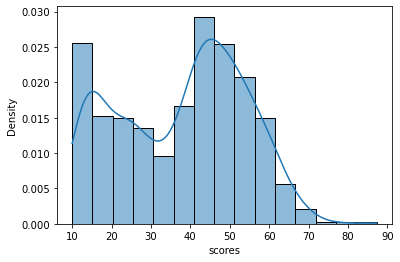

In [4]:
p = sns.histplot(data.scores, kde = True, stat = 'density');

### Intervalo de confianza

Si queremos estimar un parámetro poblacional (media, proporción, desvío estandar) a partir de un estadístico muestral, no podemos estar seguros del resultado pero podemos dar algún nivel de confianza a nuestra predicción por medio de un intervalo de confianza (CI).

|   |media|proporción|desvío estandar|   |
|---|:---:|:---:|:---:|---|
|población|$\mu$|$p$|$\sigma$|parámetros|
|muestra|$\bar{x}$|$\hat{p}$|$s$|estadísticos|

Calculemos un intervalo de confianza del 95% para la media muestral del dataset Klout Scores.

Para muestras grandes, podemos resolver esta ecuación con un nivel de alfa de $\alpha=.05$

$$\bar{x}+z_{\alpha/2}\cdot\frac{\sigma}{\sqrt{n}}\lt\mu_{estimator}\lt\bar{x}-z_{\alpha/2}\cdot\frac{\sigma}{\sqrt{n}}$$ 

Calculemos estos valores para nuestros datos:

#### Media muestral:

In [5]:
klout_xbar = data.scores.mean()
klout_xbar

37.71905483253817

#### Desvío estandar de la muestra

Como nuestar muestra es grande (de tamaño mayor que 30) podemos usar el desvío estandar muestral como aproximación de sigma


In [6]:
klout_sd = data.scores.std()
klout_sd

16.044314979048988

#### Error estandar de la muestra:


In [7]:
# We need the standard error to calculate the bounds
n = data.shape[0]
klout_se = klout_sd / math.sqrt(n)
klout_se

0.49561054484656253

#### z-scores:

Calculamos los z-score para poder calcular los límites inferior y superior del intervalo de confianza.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

**CDF**: Cumulative Distribution Function usamos `stats.cdf`

**ppf**: Percent Point Function (Inverse of CDF) usamos `stats.ppf`

In [8]:
alpha = 0.05

In [9]:
critical_value = stats.norm.ppf(alpha / 2) * (-1)
critical_value

1.9599639845400545

Una forma alternativa para obtener el intervalo de valores críticos es usar 

`interval(alpha, loc=0, scale=1)` que devuelve los límites del rango que contiene alfa-porciento de la distribución

Observemos que el argumento alfa de esta función **no** es el valor de alfa que definimos arriba, sino 1 - ese valor. 

Llamaremos nivel de confianza (confidence coefficient) al valor del argumento alpha de la función interval.

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.norm.html

In [10]:
confidence_coef = 1 - alpha
zscore_interval = stats.norm.interval(alpha=confidence_coef)
zscore_interval

(-1.959963984540054, 1.959963984540054)

#### Calculamos los límites inferior y superior del intervalo de confianza para la media de Klout Score:

In [11]:
klout_CI_mean_lower = klout_xbar - critical_value * klout_se
klout_CI_mean_upper = klout_xbar + critical_value * klout_se
klout_CI_mean_lower, klout_CI_mean_upper

(36.747676014280636, 38.690433650795704)

#### ¿Qué significa este resultado?

Un intervalo de confianza trata de capturar la media de la población real de una muestra declarando un intervalo de confianza. Esto significa que el 95% de los intervalos que calculemos a partir de muestras independientes atrapan el verdadero valor de la media poblacional.

Klout.com afirma que su puntaje promedio es 40, por lo que no obtuvimos el parámetro promedio de población real (el valor que obtuvimos es 37.7). Dado que nuestros cálculos parecen ser correctos, esto podría significar que:
* Tal vez nuestra media muestral está muy por debajo de la media poblacional. Tengamos en cuenta que solo tenemos un 95% de confianza.
* Quizás la comunicación de Klout sobre el puntaje promedio se simplifica a un valor fácil de recordar de 40.


#### Efecto del tamaño de muestra

El tamaño de la muestra afecta los límites del intervalo de confianza. Cuanto más pequeña es la muestra, menos confianza tenemos, por lo tanto, más amplio es el intervalo de confianza. Probemos esto con una muestra aleatoria de los datos de Klout Score de n = 50.


In [12]:
n_sample = 50
random_generator = np.random.default_rng()
index_sample = random_generator.choice(data.index, size = n_sample)
data_sample = data.loc[index_sample]
data_sample.head()

,scores
632,50.301524
346,12.139815
537,17.586335
466,48.208577
871,41.088487


Graficamos la distribución de la muestra

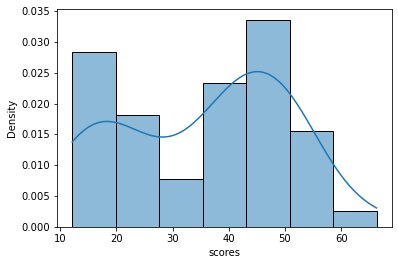

In [13]:
p = sns.histplot(data_sample.scores, kde = True, stat = 'density');

Recalculamos el intervalo de confianza:

In [14]:
# media muestral
klout_sample_xbar = data_sample.scores.mean()
klout_sample_xbar

35.6221750362

In [15]:
# desvío estandar
klout_sample_sd = data_sample.scores.std()
klout_sample_sd

14.862750918105023

In [16]:
# error estandar
n_sample = data_sample.shape[0]
klout_sample_se = klout_sample_sd / math.sqrt(n_sample)
klout_sample_se

2.1019103922557294

In [17]:
# z-score
alpha = 0.05
sample_critical_value = stats.norm.ppf(alpha / 2) * (-1)
sample_critical_value

1.9599639845400545

In [18]:
klout_sample_CI_mean_lower = klout_sample_xbar - sample_critical_value * klout_sample_se
klout_sample_CI_mean_upper = klout_sample_xbar + sample_critical_value * klout_sample_se
klout_sample_CI_mean_lower, klout_sample_CI_mean_upper

(31.50250636864831, 39.741843703751684)

Con este tamaño de muestra, estamos 95% seguros de que atrapamos el verdadero valor de la muestra en el intervalo klout_sample_CI_mean_lower, klout_sample_CI_mean_upper. 

Aunque este intervalo de confianza capta el parámetro medio, también tiene un rango mucho más grande.

## Ejercicio

Hacer una función que dados
* una población como una instancia de Series 
* un tamaño de muestra 
* un valor de alfa
* un valor de sigma
Calcule el tamaño del intervarlo de confianza para la media con ese alfa, como máximo - mínimo.

Para 20 valores de tamaño de muestra, grafiquemos el tam del intervalo vs tamaño de muestra

Ayuda: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

In [19]:
def confidence_interval_size(data, sample_size, alpha, sigma):    
    random_generator = np.random.default_rng()
    sample_data = random_generator.choice(data, size = sample_size,  replace=True)    
    sample_mean = np.mean(sample_data)
    z_critico = stats.norm.ppf(alpha/2)
    n = len(sample_data)
    ic_high = sample_mean - z_critico * sigma / math.sqrt(n)
    ic_low = sample_mean + z_critico * sigma / math.sqrt(n)
    result = ic_high - ic_low
    return result

sample_sizes = np.linspace(start=30, stop=200, num=20).astype(int)

ic_sizes = []

data_population = data.scores
sigma = klout_sd

for sample_size in sample_sizes:
    ic_size = confidence_interval_size(data_population, sample_size, alpha, sigma)
    ic_sizes.append(ic_size)

result = dict(zip(sample_sizes, ic_sizes))    

[Text(0.5, 0, 'sample sizes'), Text(0, 0.5, 'ci sizes')]

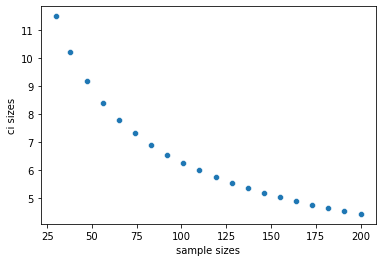

In [20]:
ax = sns.scatterplot(x=list(result.keys()), y=list(result.values()), )
ax.set(xlabel='sample sizes', ylabel='ci sizes')

## Referencias


Intervalos de Confianza
https://github.com/leonvanbokhorst/NoteBooks-Statistics-and-MachineLearning/blob/master/0013%20Confidence%20Interval%20of%20a%20Klout%20Score%20sample.ipynb

